**Практическая работа №2**

Сегодня банкам приходится использовать различные рекламные инструменты для продажи своих услуг (e-mail маркетинг, телефония, digital маркетинг и др.).

Пожалуй, сложно представить банк, который бы не звонил своим клиентам с предложением очередной услуги. Да, это можно назвать не самым лучшим методом (многих людей это раздражает), однако такая реклама все еще остается эффективной. 

Данный датасет содержит информацию о клиентах португальского банка. А также телефонных маркетинговых кампаниях. Основная услуга, которая предлагается клиентам - это срочный банковский депозит. На основе данных можно будет выдвинуть несколько гипотез и лучше познакомиться с клиентами. 

Мне интересно проанализировать этот датасет, потому что я сама работаю в отделе маркетинга и продаж. А моя ВКР связана с изучением поведения покупателей и тем, какие факторы влияют на их лояльность и конечное решение о покупке или не покупке. 

**Датасет содержит в себе следующие данные:**

**A) Данные о клиентах:**

1 - age (numeric) - возраст клиента       
2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepre eur","student", "blue-collar","self-\ employed","retired","technician","services") - сфера работы (сфера, в которой клиент работает)     
3 - marital : marital status (categorical: "married","divorced","single" - социальный статус  
4 - education (categorical: "unknown","secondary","primary","tertiary") - образование  
5 - default: has credit in default? (binary: "yes","no") - дефолт (когда клиент не может выплатить кредит)  
6 - balance: average yearly balance, in euros (numeric) - баланс   
7 - housing: has housing loan? (binary: "yes","no") - налиие ипотеки   
8 - loan: has personal loan? (binary: "yes","no") - наличие кредита

**В) Данные о последней телефонной рекламной кампании:**

9 - contact: contact communication type (categorical: "unknown","telephone","cellular") - тип связи  
10 - day: last contact day of the month (numeric) - день (Последний день, когда был контакт)  
11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec") - месяц  
12 - duration: last contact duration, in seconds (numeric) - продолжительность разговра 

**С) Дополнительные данные:**

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) - количество контактов в течение этой кампании    
14 - pdays: number of days that passed by after the client was last
contacted from a previous campaign (numeric, -1 means client was
not previously contacted) - дни от последнего контакта    
15 - previous: number of contacts performed before this campaign
and for this client (numeric) - количество контактов  ранее (до кампании)   
16 - poutcome: outcome of the previous marketing campaign
(categorical: "unknown","other","failure","success") - результат
прошлой кампании 

**D) Желаемая цель:**    
17 - y - has the client subscribed a term deposit? (binary: "yes","no") - подписка 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
bank_m = pd.read_csv("train.csv", delimiter=';')
bank_m.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
bank_m.info() #начнем с анализа данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Датасет содержит в себе 45211 строк, 17 колонок. Пропущенных значений нет. 7 числовых значений и 10 текстовых значений. 

In [3]:
bank_m.nunique() #количество уникальных значений

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [4]:
bank_m.columns #переименуем колоники, чтобы было удобнее дальше анализировать 

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
bank_m.rename(columns = {'age':'возраст', 'job':'сфера работы', 'marital':'статус',
                            'education':'образование', 'default':'дефолт', 'balance':'баланс', 
                            'housing':'ипотека','loan':'кредит', 
                            'contact':'тип связи', 'day':'день', 
                            'month':'месяц', 'duration':'продолжительность разговора', 'campaign':'количество контактов',
                            'pdays':'дни от последнего контакта', 'previous':'количество контактов ранее', 'poutcome':'результат прошлой кампании', 
                            'y':'подписка'}, inplace = True)

In [6]:
bank_m.tail() #посмотрим на конец датасета и проверим, переименовались ли колонки 

,возраст,сфера работы,статус,образование,дефолт,баланс,ипотека,кредит,тип связи,день,месяц,продолжительность разговора,количество контактов,дни от последнего контакта,количество контактов ранее,результат прошлой кампании,подписка
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
bank_m.describe()

,возраст,баланс,день,продолжительность разговора,количество контактов,дни от последнего контакта,количество контактов ранее
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
bank_m.describe(include=[np.object]) 

C:\Users\kolya\AppData\Local\Temp\ipykernel_32936\2414198735.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bank_m.describe(include=[np.object])


,сфера работы,статус,образование,дефолт,ипотека,кредит,тип связи,месяц,результат прошлой кампании,подписка
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


<AxesSubplot:xlabel='возраст', ylabel='Count'>

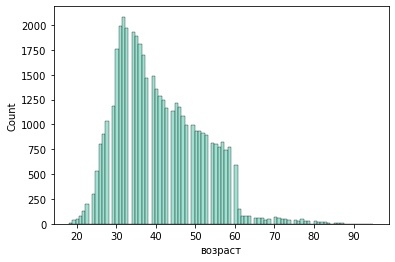

In [9]:
sns.histplot(bank_m['возраст'], color = '#7cdac4ff')

<AxesSubplot:ylabel='баланс'>

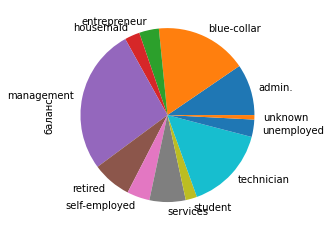

In [10]:
bank_m.groupby('сфера работы')['баланс'].sum().plot(kind='pie') #круговая диаграмма 

<AxesSubplot:ylabel='баланс'>

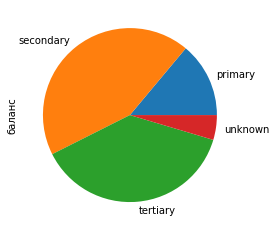

In [11]:
bank_m.groupby('образование')['баланс'].sum().plot(kind='pie')

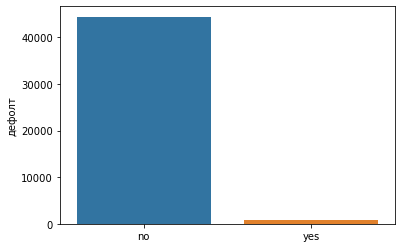

In [12]:
sns.barplot(x=bank_m['дефолт'].value_counts().index, y=bank_m['дефолт'].value_counts())
plt.show() #столбчатая диаграмма 

Датасет содержит не так много персональной информации о клиентах. 
На певом этапе удалось выяснтить:
- средний возраст клиентов 40 лет, хотя разброс лежит от 18 до 95 лет
- больше всего денежных средств на счете у работников в сфере менеджмента и у тех, кто окончил среднуюю школу (интересно, что люди с вышим професссилнальным образованием расположились на втором месте по размеру баланса)
- Лишь малая часть клиентов не может выплатить свои долги из-за дефолта 

Датасет содержит в себе информацию о прошлой рекламной маркетинговой кампании. Изучим подробнее. 

In [13]:
bank_m['месяц'].value_counts() #в какие месяцы чаще всего совершались звонки с предложением услуги 

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: месяц, dtype: int64

In [15]:
bank_m['продолжительность разговора'].mean() #средняя продолжительность разговора с клиетами 

258.1630797814691

In [20]:
results = bank_m.groupby('результат прошлой кампании')['статус','продолжительность разговора'].sum().sort_values(by=['продолжительность разговора'], ascending=False).head(n=10)
results #множественная сортировка и фильтрация по убыванию 

C:\Users\kolya\AppData\Local\Temp\ipykernel_32936\4294529235.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  results = bank_m.groupby('результат прошлой кампании')['статус','продолжительность разговора'].sum().sort_values(by=['продолжительность разговора'], ascending=False).head(n=10)


,продолжительность разговора
результат прошлой кампании,
unknown,9525751
failure,1196755
success,478789
other,470516


<AxesSubplot:xlabel='результат прошлой кампании'>

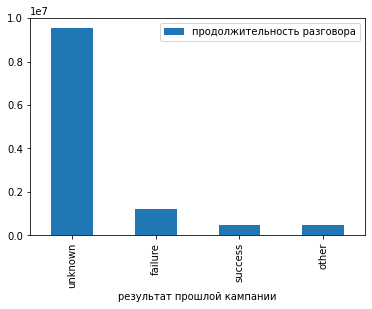

In [21]:
results.plot(kind='bar')

По первому исследованию кампании можно сказать следующее:
- Рекламная кампания длилась в течение года, большая часть звонков пришлась на май
- Средняя продолжительность разговора с клиентом составляла 258 секунд 
- к сожалению, в датасете известно очень мало про то, как завершилась рекламная кампания (успешно или нет)

Далее посмотрим есть ли взамосвязи.

In [22]:
bank_m["кредит_cat"] = np.where(bank_m['кредит'] == "yes", 1, 0)

In [23]:
bank_m["подписка_cat"] = np.where(bank_m['подписка'] == "yes", 1, 0)

In [24]:
bank_m["результат прошлой кампании"] = bank_m["результат прошлой кампании"].astype('category')

In [25]:
bank_m["результат прошлой кампании_cat"] = bank_m["результат прошлой кампании"].cat.codes
bank_m.head()

,возраст,сфера работы,статус,образование,дефолт,баланс,ипотека,кредит,тип связи,день,месяц,продолжительность разговора,количество контактов,дни от последнего контакта,количество контактов ранее,результат прошлой кампании,подписка,кредит_cat,подписка_cat,результат прошлой кампании_cat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,0,3
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,0,3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,0,3
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,0,3
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,0,3


In [27]:
cols_num = ['возраст', 'баланс', 'продолжительность разговора', 'количество контактов', 'количество контактов ранее',
            'дни от последнего контакта', 'результат прошлой кампании_cat', 'подписка_cat', 'кредит_cat']

In [30]:
correlation = bank_m.corr().loc[cols_num, cols_num] 

<AxesSubplot:>

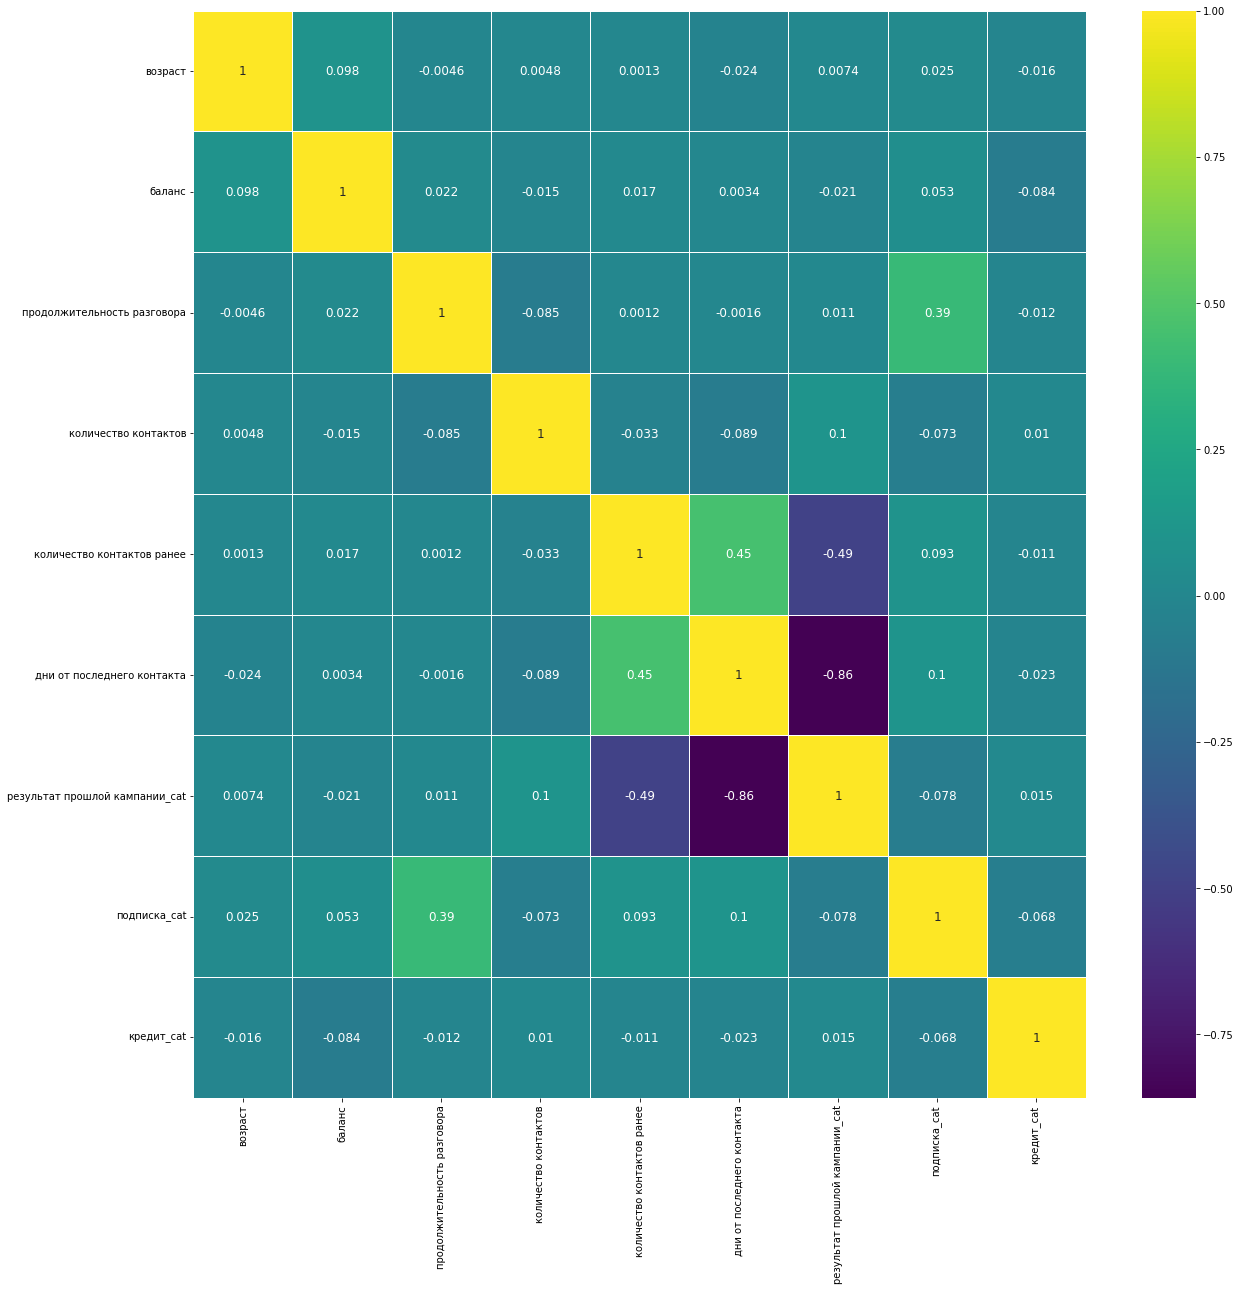

In [31]:
fig , ax = plt.subplots(figsize = (20,20))

sns.heatmap(correlation, 
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12}) #тепловая карта

На первый взгляд кажется, что данные особо не влияют друг на друга. Прослеживается взаимосвязь между продолжительностью разговора и подпиской; количеством контактов до рекламной кампании и количеством дней от последнего контакта с клиентом. 

Во время изучения данных у меня возникло несколько гипотез.

Гипотеза №1. Нулевая гипотеза (H0) заключается в том, что в генеральной совокупности не существует зависимости между наличием ипотеки и социальным статусом клиента.

H1 гипотеза аключается в том, что в генеральной совокупности существует зависимост между наличием ипотеки и социальным статусом клиента.


В повседневной жизни я часто сталкиваюсь с тем, что люди создают семью и берут совметную ипотеку на квартиру. Интересно посмотреть, как это связано с клиентами в данном датасете. 

In [32]:
#В данном случае мы смотрим на распределение наблюдений по категориям и строим таблицу сопряженности.
#С помощью критерия независимости хи-квадрат мы определим есть ли связь между признаками "социальный статус" и "ипотека"

In [37]:
alpha = 0.01 #наш уровень значимости, чтобы иметь возможность только 1% ошибки первого рода
critical_value = 6.63

In [38]:
house = bank_m.groupby('ипотека')['статус'].value_counts().unstack()
house #матрица наблюдаемых частот

статус,divorced,married,single
ипотека,,,
no,2300,11893,5888
yes,2907,15321,6902


In [39]:
import scipy.stats #импортируем бибилотеку 

In [42]:
scipy.stats.chi2_contingency(house)
#проверяем гипотизу с помощью критерия хи-квадрат. 

(19.34482003586502,
 6.29978462961484e-05,
 2,
 array([[ 2312.75059167, 12087.41974298,  5680.82966535],
        [ 2894.24940833, 15126.58025702,  7109.17033465]]))

Наш критерий (19.34482003586502) болше критического значения (6.63), а значит, что мы можем отвергнуть нулевую гипотезу.
А значит, что социальный статус человека имеет влияние на наличие у него ипотеки. Изобразим зависимсоть на графике ниже. 

<AxesSubplot:xlabel='статус'>

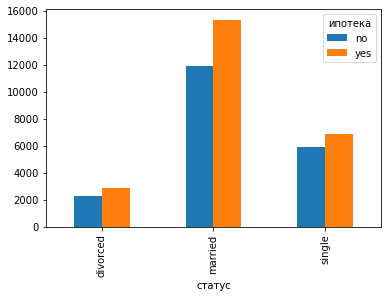

In [43]:
bank_m.groupby('статус')['ипотека'].value_counts().unstack().plot(kind='bar')

Далее мне стало интересно проверить есть ли взаимосвязь между социальным статусом и кредитом. Можно это проверить.

In [44]:
loan = bank_m.groupby('кредит')['статус'].value_counts().unstack()
loan

статус,divorced,married,single
кредит,,,
no,4286,22554,11127
yes,921,4660,1663


In [46]:
scipy.stats.chi2_contingency(loan)
#проверяем гипотизу с помощью критерия хи-квадрат. 

(121.95253536316297,
 3.298704544931424e-27,
 2,
 array([[ 4372.70064807, 22853.59620446, 10740.70314746],
        [  834.29935193,  4360.40379554,  2049.29685254]]))

<AxesSubplot:xlabel='статус'>

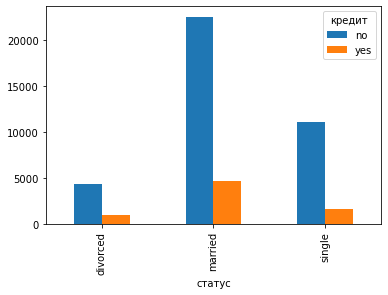

In [47]:
bank_m.groupby('статус')['кредит'].value_counts().unstack().plot(kind='bar')

Чаще всего семейные люди выплачивают ипотеку, нежели кредит. 

Гипотеза 2. Нулевая гипотеза (H0) заключается в том, что в генеральной совокупности не существует зависимости между продолжительностью разговора и результатом рекламной кампании. 

H1 гипотеза аключается в том, что в генеральной совокупности существует зависимост между продолжительностью разговора и результатом рекламной кампании. 


Т.к. я работаю в отделе маркетинга и продаж, могу сказать, что продолжительность разговора должна быть 15-20 минут, это идеальный вариат. За меньшее время будет сложнее выявить потребность клиента, а за большее время его можно утомить предложениями и запутать. Выше мы проверяли, что средняя продолжительность разговора в нашем датасете 258 секунд (всего лишь около 4 минут).

In [51]:
bank_m["результат прошлой кампании_cat"].value_counts() #3 - неизвестно, 0 - провал, 1 - другое, 2 - успех 

3    36959
0     4901
1     1840
2     1511
Name: результат прошлой кампании_cat, dtype: int64

In [53]:
success = bank_m[bank_m['результат прошлой кампании_cat'] == 2]['продолжительность разговора'] 
failure = bank_m[bank_m['результат прошлой кампании_cat'] == 0]['продолжительность разговора']
#выделим группы тех, с кем кампания была проведена успешно и тех, с кем провально 

<AxesSubplot:>

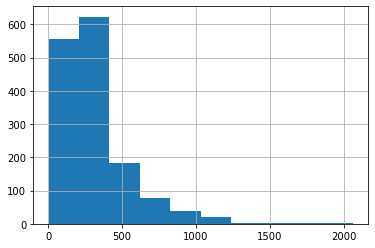

In [54]:
success.hist()

<AxesSubplot:>

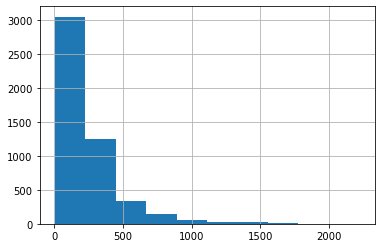

In [55]:
failure.hist()

In [1]:
alpha = 0.05
#Двусторонний тест

In [58]:
scipy.stats.ttest_ind(success,failure, equal_var=False) # Проверяем с помощью модели t-тест

Ttest_indResult(statistic=10.52862438167293, pvalue=2.226664892450268e-25)

In [60]:
p_value = scipy.stats.ttest_ind(success, failure, equal_var=False)[-1]

p_value - маленькая, следовательно мы отклоняем H0 гипотезу, разница между средними статистически значима.

Можно сделать вывод, что продолжительность разговора влияет на результат рекламной кампании. 

Гипотеза 3. Существует взаимосвязь между количеством контактов с клиентов, которы были провеенв до рекламной кампании и промежуток времени до нового контакта (дни от последнего контакта)

In [62]:
X = bank_m['количество контактов ранее']
y = bank_m['дни от последнего контакта']
res = scipy.stats.linregress(X, y)
print(res)
#выбираем две зависимые переменные 

LinregressResult(slope=19.770646986071363, intercept=28.724459424176537, rvalue=0.4548196354805003, pvalue=0.0, stderr=0.18207231129045254, intercept_stderr=0.43249354677370894)


In [63]:
r_sq = res.rvalue ** 2
print(r_sq) #коэффициент детерминации
#0,2 - говорит о том, что качественная характеристика силы связи слабая 

0.20686090081861516


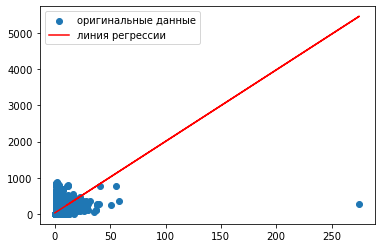

In [64]:
plt.scatter(X, y, label = 'оригинальные данные')
plt.plot(X, res.intercept + res.slope * X, 'r', label = 'линия регрессии')
plt.legend()
plt.show()
# Отобразим линию регресси 

Гипотеза 4. С помощью логистчиеской регрессии мы сможем оценить существует ли взаимосвязь между наличием кредита у клиента и его конечным решением подписаться на предлагаемую услугу. 

In [66]:
import statsmodels.api as sm

In [67]:
X = bank_m['кредит_cat']
y = bank_m['подписка_cat']
X_constant = sm.add_constant(X)
logit = sm.Logit(y, X_constant).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.358244
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           подписка_cat   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45209
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                0.007289
Time:                        01:31:22   Log-Likelihood:                -16197.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                 1.157e-53
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9317      0.015   -125.145      0.000      -1.962      -1.901
кредит_cat    -0.7049      0.

In [2]:
#- 1.9317   - отношение вероятности того, что событие наступит
#-1.3022 - отношение вероятности того, что событие не наступит

In [69]:
np.exp(-1.9317) 

0.14490165616654668

In [70]:
np.exp(-0.7049)

0.49415798758419255

In [71]:
bank_m.groupby('подписка')['кредит'].value_counts().unstack()

кредит,no,yes
подписка,,
no,33162,6760
yes,4805,484


In [72]:
bank_m.groupby('подписка_cat')['кредит_cat'].value_counts().unstack()

кредит_cat,0,1
подписка_cat,,
0,33162,6760
1,4805,484


In [73]:
p_1_yes = 484 / (484 + 6760) 
p_0_yes = 1 - p_1_yes #вероятность наступления события 
odds_1_yes = p_1_yes / p_0_yes 
print(odds_1_yes) #рассчитываем шанс того, что человек у кторого есть кридит - подпишется 
print(np.log(odds_1_yes))

0.07159763313609467
-2.636693262320378


In [74]:
p_1_no = 4805 / (4805 + 33162) 
p_0_no = 1 - p_1_no #вероятность наступления события 
odds_1_no = p_1_no / p_0_no
print(odds_1_no) #рассчитываем шанс того, что человек у кторого нет кридита - подпишется 
print(np.log(odds_1_no))

0.1448947590615765
-1.931747599656925


In [75]:
odds_fem_yes = (4805 / 33162) / (484 / 6760)
print(odds_fem_yes)
print(np.log(odds_fem_yes))

2.0237367174716057
0.7049456626634529


Кажется, что наличие кредита не влияет на конечное решение клиента подписаться на новую услугу. 

Таким образом, мы проанализировали датасет, изучили клиентов банка и рекламные кампании, а также проверили несколько гипотез. Можно сделать вывод, что решение клиента о покупке услуги не всегда зависит от внешних факторов. Например, мы видим, что взаимосвязь с некоторыми признаками есть, но кажется, что она не ярко выражена и не играет конечную роль в принятии решения.

Кажется, что телемаркетинг сегодня уже не так актуален и эффективен. Однако важно отметить, что на его успешность влияют следущие факторы:
- Подготовка к разговору заранее
- Уверенность и компетентность продавца
- Уменее завлечь клиента разговором
- Уменее уйти от использование клишированных фраз 

К сожалению, таких данных в датасете не представлено. 